[1] 필요한 패키지 불러오기

In [3]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 38.2 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow

  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 38.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 48.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 43.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.9 MB/s eta 0:00:00
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --upgrade setuptools

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses

[2] 데이터 준비 함수 정의하기

In [2]:
def prepare_data():
    iris = load_iris()
    X = iris.data[:,2:]
    y= iris.target
    lbl_str = iris.target_names
    X_tr,X_val,y_tr,y_val = train_test_split(X,y,test_size=0.2)
    return X_tr,y_tr,X_val,y_val,lbl_str

[3] 분류 결과의 시각화 함수 정의

In [3]:
def visualize(net, X, y, multi_class, labels, class_id, colors,
               xlabel, ylabel, legend_loc='lower right'):
    # 데이터의 최소~최대 범위를 0.05 간격의 좌표값으로 나열
    x_max = np.ceil(np.max(X[:, 0])).astype(int)
    x_min = np.floor(np.min(X[:, 0])).astype(int)
    y_max = np.ceil(np.max(X[:, 1])).astype(int)
    y_min = np.floor(np.min(X[:, 1])).astype(int)
    x_lin = np.linspace(x_min, x_max, (x_max-x_min)*20+1)
    y_lin = np.linspace(y_min, y_max, (y_max-y_min)*20+1)

    # x_lin과 y_lin의 격자좌표의 x와 y 값 구하기
    x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)

    # (x, y) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])

    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = net.predict(X_test)
        y_hat = np.array([np.argmax(y_hat[k])
                            for k in range(len(y_hat))], dtype=int)
    else:
        y_hat = (net.predict(X_test) >= 0.5).astype(int)
        y_hat = y_hat.reshape(len(y_hat))

    # 출력할 그래프의 수평/수직 범위 설정
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # 클래스별로 산점도 그리기
    for c, i, c_name in zip(colors, labels, class_id):
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                     c = c, s = 5, alpha = 0.3, edgecolors = 'none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y == i, 0], X[y == i, 1],
                     c = c, s = 20, label=c_name)
    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)
    # x축과 y축의 레이블을 지정한 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()

[4] 훈련 데이터 준비하기

In [4]:
nSamples = 150
nDim = 2
nClasses = 3
X_tr, y_tr, X_val, y_val, labels = prepare_data()

[5] 모델 구성

In [5]:
bp_model_tf = keras.Sequential()
bp_model_tf.add(layers.InputLayer(input_shape=(nDim,)))
bp_model_tf.add(layers.Dense(4, activation='sigmoid'))
bp_model_tf.add(layers.Dense(nClasses, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


[6] 모델의 요약 정보 출력

In [6]:
bp_model_tf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

[7] 모델 컴파일

In [9]:
bp_model_tf.compile(optimizer=optimizers.SGD(0.1, momentum=0.9),
                    loss=losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

[8] 모델의 학습

In [10]:
bp_model_tf.fit(X_tr, y_tr, batch_size=15, epochs=1000, verbose=2,
                validation_data=(X_val,y_val))

Epoch 1/1000
8/8 - 0s - 36ms/step - accuracy: 0.3417 - loss: 1.1697 - val_accuracy: 0.3000 - val_loss: 1.0917
Epoch 2/1000
8/8 - 0s - 2ms/step - accuracy: 0.3417 - loss: 1.0623 - val_accuracy: 0.3000 - val_loss: 1.0396
Epoch 3/1000
8/8 - 0s - 2ms/step - accuracy: 0.6250 - loss: 0.9645 - val_accuracy: 0.7333 - val_loss: 0.8976
Epoch 4/1000
8/8 - 0s - 2ms/step - accuracy: 0.6917 - loss: 0.8405 - val_accuracy: 0.9000 - val_loss: 0.7844
Epoch 5/1000
8/8 - 0s - 2ms/step - accuracy: 0.7167 - loss: 0.7332 - val_accuracy: 0.6333 - val_loss: 0.7038
Epoch 6/1000
8/8 - 0s - 2ms/step - accuracy: 0.6833 - loss: 0.6394 - val_accuracy: 0.7000 - val_loss: 0.6012
Epoch 7/1000
8/8 - 0s - 2ms/step - accuracy: 0.7750 - loss: 0.5701 - val_accuracy: 0.7000 - val_loss: 0.5391
Epoch 8/1000
8/8 - 0s - 2ms/step - accuracy: 0.7500 - loss: 0.5167 - val_accuracy: 0.7000 - val_loss: 0.5105
Epoch 9/1000
8/8 - 0s - 2ms/step - accuracy: 0.7417 - loss: 0.4916 - val_accuracy: 0.7667 - val_loss: 0.4805
Epoch 10/1000
8/8 

[9] 훈련된 모델을 이용한 분류

In [13]:
y_hat = bp_model_tf.predict(X_val, verbose=0)
y_hat_lbls = np.array([np.argmax(y_hat[k])
                       for k in range(len(X_val))])
nCorrect = (y_hat_lbls == y_val).sum()
print('Validation accuracy: {}/{} --> {:7.3f}%'.
      format(nCorrect, len(X_val), nCorrect * 100.0 / len(X_val)))

Validation accuracy: 30/30 --> 100.000%


[10] 특징 공간 결정 영역 시각화

231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


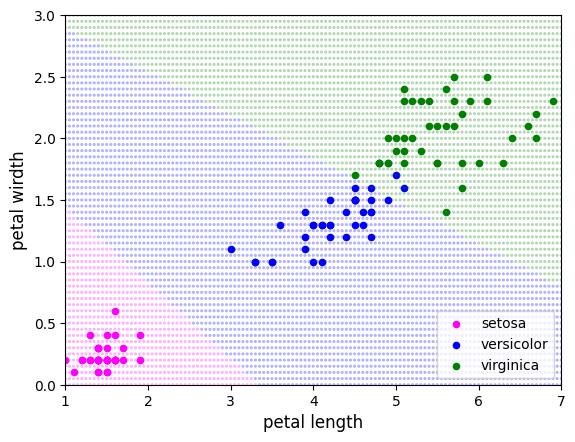

In [14]:
visualize(bp_model_tf, X_tr, y_tr,
          multi_class=True,
          class_id=labels,
          labels=[0,1,2],
          colors=['magenta','blue','green'],
          xlabel='petal length',
          ylabel='petal wirdth')